# Progetto


In [3]:
!pip install afinn
!pip install wordcloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import string
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from afinn import Afinn
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.lancaster import LancasterStemmer
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chantal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chantal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset

In [23]:
#lettura del csv
reviews = pd.read_csv("reviews_clean.csv")

#settare questo campo nel caso in cui il testo dei commenti sia molto lungo
pd.set_option('display.max_colwidth', -1)

C:\Users\Chantal\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


Controllare che il dataset sia stato installato correttamente andando a  verificare che le prime sei righe siano piene.

In [9]:
print(type(reviews))
print("il numero di righe è:", len(reviews)) #lunghezza = numero di righe
print("Le prime sei righe sono:", reviews.head(6), "il dataset non è vuoto") # funzione opposta è tail

<class 'pandas.core.frame.DataFrame'>
il numero di righe è: 1988854
Le prime sei righe sono:    Unnamed: 0             _id     product  \
0  0           R5U4GZKVIS0NK   B07DMJPV31   
1  1           RSJ27FXLJ5Z7B   B07DMJPV31   
2  2           R1JAIU95UEJC3Z  B07DMJPV31   
3  3           RQJ5C2HTKCDWT   B07DMJPV31   
4  4           R3SBWLGWQPO8W3  B07DMJPV31   
5  5           R368BZKBB3L13V  B07DMJPV31   

                                                                            title  \
0  Senza senso                                                                      
1  Sconsiglio caldamente l'acquisto di questo gioco!                                
2  Penoso, irreale,la difesa ancora peggio degli scorsi anni,i terzini esistono ?   
3  Stesso gioco stesso MINESTRONE!!!!!                                              
4  Ci sta                                                                           
5  Delusione totale                                                              

In [24]:
### Tokenization
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags

    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [25]:
i = 0
for x in reviews["body"][0:10]:
    token = preprocess(x)
    reviews["body"][i] = token
    i = i+1
print(reviews["body"][0:10])

C:\Users\Chantal\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    [Non, ho, mai, scritto, una, recensione, in, vita, mia, ma, per, questo, gioco, sento, proprio, il, bisogno, di, scriverci, qualcosa, ., Parto, consigliando, a, tutti, di, non, acquistare, questo, gioco, perch, Ã, ©, BUTTATE, i, vostri, i, soldi, ., Sono, arrivato, a, questa, conclusione, semplicemente, perch, Ã, ©, che, tu, sia, bravo, o, meno, non, importa, ,, e, il, gioco, che, decide, per, te, ,, tra, 8, /, 9, gol, a, partita, o, errori, assurdi, fatti, dalla, cpu, il, tuo, â, €, œgiocareâ, €, �, passa, in, secondo, piano, ., Ormai, credo, che, la, EA, preferisca, arricchirsi, con, vendite, di, ...]                                               
1    [Uno, dei, peggiori, se, non, il, peggior, gioco, Fifa, degli, ultimi, anni, ,, dovrebbe, essere, il, gioco, di, calcio, piÃ¹, realistico, al, mondo, ma, quello, che, ho, visto, nei, tiri, ,, nei, passaggi, o, negli, interventi, della, cpu, Ã, ¨, pura, fantascienza, ,, non, ero, rimasto, soddisfatto, nemmeno, del, precedente, capi

In [26]:
# LOWER CASE
#per ogni item in x trasformalo in lower case
lowered_text = reviews["body"][0:10].apply(lambda x: [item.lower() for item in x])
lowered_text.head(10)


0    [non, ho, mai, scritto, una, recensione, in, vita, mia, ma, per, questo, gioco, sento, proprio, il, bisogno, di, scriverci, qualcosa, ., parto, consigliando, a, tutti, di, non, acquistare, questo, gioco, perch, ã, ©, buttate, i, vostri, i, soldi, ., sono, arrivato, a, questa, conclusione, semplicemente, perch, ã, ©, che, tu, sia, bravo, o, meno, non, importa, ,, e, il, gioco, che, decide, per, te, ,, tra, 8, /, 9, gol, a, partita, o, errori, assurdi, fatti, dalla, cpu, il, tuo, â, €, œgiocareâ, €, �, passa, in, secondo, piano, ., ormai, credo, che, la, ea, preferisca, arricchirsi, con, vendite, di, ...]                                               
1    [uno, dei, peggiori, se, non, il, peggior, gioco, fifa, degli, ultimi, anni, ,, dovrebbe, essere, il, gioco, di, calcio, piã¹, realistico, al, mondo, ma, quello, che, ho, visto, nei, tiri, ,, nei, passaggi, o, negli, interventi, della, cpu, ã, ¨, pura, fantascienza, ,, non, ero, rimasto, soddisfatto, nemmeno, del, precedente, capi

### Stop Removal

In [29]:
# STOP REMOVAL
#Elenco di tutte le stop words
stop = stopwords.words("italian")
stop = set(stop)
stop.add("The")
stop.add("And")
stop.add("I")
stop.add("J")
stop.add("K")
stop.add("I'd")
stop.add("That's")
stop.add("\x81")
stop.add("It")
stop.add("I'm")
stop.add("...")
stop.add("\x89")
stop.add("ĚĄ")
stop.add("it's")
stop.add("ă")
stop.add("ã")
stop.add("â")
stop.add("ã¹")
stop.add("\x9d")
stop.add("âÂĺ")
stop.add("Ě")
stop.add("˘")
stop.add("Â")
stop.add("âÂ")
stop.add("Ň")
stop.add("http")
stop.add("https")
stop.add("co")
stop.add("000")
stop.add("Ň")
stop.add("Ň")
stop.add("Ň")
stop.add("�")
stop.add("©")
stop.add("€")
stop.add("¨")
stop.add("™")

stop = list(stop)

In [0]:
#Sarà da togliere, ma lo applicavo due volte perché non mi andava subito
tokenized_stop  = lowered_text.apply(lambda x: [item for item in x if item not in stop])
tokenized_stop.iloc[1:10]

In [30]:
# STOPWORD REMOVAL
# http è presente nella lista su, ma non me lo vede
stopword_removed_text = lowered_text.apply(lambda x: [item for item in x if item not in stop])
stopword_removed_text = stopword_removed_text.apply(lambda x: [item for item in x if not "http" in item])
stopword_removed_text

0    [mai, scritto, recensione, vita, gioco, sento, proprio, bisogno, scriverci, qualcosa, ., parto, consigliando, acquistare, gioco, perch, buttate, soldi, ., arrivato, conclusione, semplicemente, perch, bravo, meno, importa, ,, gioco, decide, te, ,, 8, /, 9, gol, partita, errori, assurdi, fatti, cpu, œgiocareâ, passa, secondo, piano, ., ormai, credo, ea, preferisca, arricchirsi, vendite, giochi, fifa, points, senza, pensare, minimamente, gamplay, rendere, prodotto, giocabile, ., gioco, fifa, ormai, 7, -, 8, anni, credo, peggiore, molto, deluso, ., detto, auguri, tutte, persone, compreranno, gioco, divertirsi, .]                                                                                                                                                                                             
1    [peggiori, peggior, gioco, fifa, ultimi, anni, ,, dovrebbe, essere, gioco, calcio, piã¹, realistico, mondo, visto, tiri, ,, passaggi, interventi, cpu, pura, fantascienza, ,, rimasto, s

In [32]:
# REMOVE WORDS WHOSE LENGTH IS LESS THAN 3
stopword_removed_text = stopword_removed_text.apply(lambda x: [item for item in x if len(item) >= 3])
print(stopword_removed_text[0:10])

0    [mai, scritto, recensione, vita, gioco, sento, proprio, bisogno, scriverci, qualcosa, parto, consigliando, acquistare, gioco, perch, buttate, soldi, arrivato, conclusione, semplicemente, perch, bravo, meno, importa, gioco, decide, gol, partita, errori, assurdi, fatti, cpu, œgiocareâ, passa, secondo, piano, ormai, credo, preferisca, arricchirsi, vendite, giochi, fifa, points, senza, pensare, minimamente, gamplay, rendere, prodotto, giocabile, gioco, fifa, ormai, anni, credo, peggiore, molto, deluso, detto, auguri, tutte, persone, compreranno, gioco, divertirsi]                                                                                                                                                                                                                                                                                                                                     
1    [peggiori, peggior, gioco, fifa, ultimi, anni, dovrebbe, essere, gioco, calcio, piã¹, realistico, 

# Questione emoji?


### Punctuation Removal

In [33]:
# PUNCTUATION REMOVAL
#Elenco di tutti i simboli di punteggiatura
punctuation = string.punctuation

#Elimino i simboli di punteggiatura
punctuation = string.punctuation + "’“”"
punctuation_removed_text = stopword_removed_text.apply(lambda x: [item for item in x if item not in punctuation])
punctuation_removed_text.iloc[0:10]

0    [mai, scritto, recensione, vita, gioco, sento, proprio, bisogno, scriverci, qualcosa, parto, consigliando, acquistare, gioco, perch, buttate, soldi, arrivato, conclusione, semplicemente, perch, bravo, meno, importa, gioco, decide, gol, partita, errori, assurdi, fatti, cpu, œgiocareâ, passa, secondo, piano, ormai, credo, preferisca, arricchirsi, vendite, giochi, fifa, points, senza, pensare, minimamente, gamplay, rendere, prodotto, giocabile, gioco, fifa, ormai, anni, credo, peggiore, molto, deluso, detto, auguri, tutte, persone, compreranno, gioco, divertirsi]                                                                                                                                                                                                                                                                                                                                     
1    [peggiori, peggior, gioco, fifa, ultimi, anni, dovrebbe, essere, gioco, calcio, piã¹, realistico, 

### Number Removal

In [34]:
preprocessed_text = punctuation_removed_text.apply(lambda x: [item for item in x if not item.isdigit()]) 
preprocessed_text.head(10)


0    [mai, scritto, recensione, vita, gioco, sento, proprio, bisogno, scriverci, qualcosa, parto, consigliando, acquistare, gioco, perch, buttate, soldi, arrivato, conclusione, semplicemente, perch, bravo, meno, importa, gioco, decide, gol, partita, errori, assurdi, fatti, cpu, œgiocareâ, passa, secondo, piano, ormai, credo, preferisca, arricchirsi, vendite, giochi, fifa, points, senza, pensare, minimamente, gamplay, rendere, prodotto, giocabile, gioco, fifa, ormai, anni, credo, peggiore, molto, deluso, detto, auguri, tutte, persone, compreranno, gioco, divertirsi]                                                                                                                                                                                                                                                                                                                                     
1    [peggiori, peggior, gioco, fifa, ultimi, anni, dovrebbe, essere, gioco, calcio, piã¹, realistico, 

### Stemming

In [35]:
lancaster_stemmer = LancasterStemmer()

tokenized_stemming = preprocessed_text.apply(lambda x: [lancaster_stemmer.stem(item) for item in x])
tokenized_stemming.head(10)

0    [mai, scritto, recend, vit, gioco, sento, proprio, bisogno, scriverci, qualcos, parto, consigliando, acquist, gioco, perch, but, sold, arrivato, conclud, sempl, perch, bravo, meno, import, gioco, decid, gol, partit, error, assurd, fatt, cpu, œgiocareâ, pass, secondo, piano, orma, credo, preferisc, arricchirs, vendit, gioch, fif, point, senz, pens, minima, gamplay, rend, prodotto, gioc, gioco, fif, orma, ann, credo, peggy, molto, deluso, detto, augur, tut, person, compreranno, gioco, divertirs]                                                                                                                                                                                                                                                                                               
1    [peggior, peggy, gioco, fif, ultim, ann, dovreb, ess, gioco, calcio, piã¹, realistico, mondo, visto, tir, passagg, intervent, cpu, pur, fantascienz, rimasto, soddisfatto, nemmeno, prec, capitolo, fif, dev

### Counter most frequently

In [36]:
#itertools chain con gli elementi che siano hanno si crea una specie di catena
sentences = (list(itertools.chain(preprocessed_text)))
#per ogni item nella sublist, restituisci item e per tutti qesti item si forma una lista
flat_list = [item for sublist in sentences for item in sublist]
c = Counter(flat_list)
c.most_common(10)
print (flat_list)

['mai', 'scritto', 'recensione', 'vita', 'gioco', 'sento', 'proprio', 'bisogno', 'scriverci', 'qualcosa', 'parto', 'consigliando', 'acquistare', 'gioco', 'perch', 'buttate', 'soldi', 'arrivato', 'conclusione', 'semplicemente', 'perch', 'bravo', 'meno', 'importa', 'gioco', 'decide', 'gol', 'partita', 'errori', 'assurdi', 'fatti', 'cpu', 'œgiocareâ', 'passa', 'secondo', 'piano', 'ormai', 'credo', 'preferisca', 'arricchirsi', 'vendite', 'giochi', 'fifa', 'points', 'senza', 'pensare', 'minimamente', 'gamplay', 'rendere', 'prodotto', 'giocabile', 'gioco', 'fifa', 'ormai', 'anni', 'credo', 'peggiore', 'molto', 'deluso', 'detto', 'auguri', 'tutte', 'persone', 'compreranno', 'gioco', 'divertirsi', 'peggiori', 'peggior', 'gioco', 'fifa', 'ultimi', 'anni', 'dovrebbe', 'essere', 'gioco', 'calcio', 'piã¹', 'realistico', 'mondo', 'visto', 'tiri', 'passaggi', 'interventi', 'cpu', 'pura', 'fantascienza', 'rimasto', 'soddisfatto', 'nemmeno', 'precedente', 'capitolo', 'fifa', 'devo', 'dire', 'ora', 'or

### Visualize word
Generic word without a sentiment

(-0.5, 399.5, 199.5, -0.5)

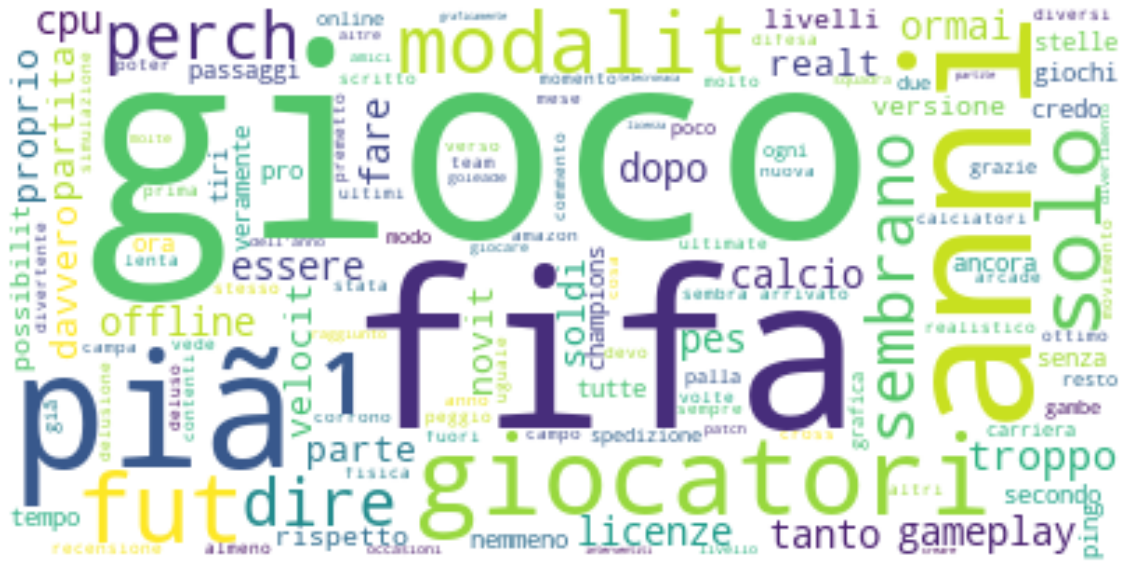

In [37]:
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

# Sentiment analysis lexic based